# Customer Churn Prediction

## Data Description

The training dataset contains 3333 samples. Each sample contains 20 features (6 Categorical and 14 Continous) and 1 boolean variable "churn" which indicates the class of the sample. The 20 input features and 1 target variable are:

* **Account_Length**: numerical. Number of months the customer has been with the current telco provider
* **Vmail_Message**: numerical. Number of voice-mail messages.
* **Day_Mins**: numerical. Total minutes of day calls.
* **Eve_Mins** numerical. Total minutes of evening calls.
* **Night_Mins**: numerical. Total minutes of night calls.
*  **Intl_Mins**: numerical. Total minutes of international calls.
* **CustServ_Calls**: numerical. Number of calls to customer service
* **Churn**: (yes/no). Customer churn - target variable.
* **Intl_Plan**: (yes/no). The customer has international plan.
* **Vmail_Plan**: (yes/no). The customer has voice mail plan.
* **Day_Calls**: numerical. Total minutes of day calls.
* **Day_Charge**: numerical. Total charge of day calls.
* **Eve_Calls**: numerical. Total number of evening calls.
* **Eve_Charge**: numerical. Total charge of evening calls.
* **Night_Calls** numerical. Total number of night calls.
* **Night_Charge**: numerical. Total charge of night calls.
* **Intl_Calls**: numerical. Total number of international calls.
* **Intl_Charge**: numerical. Total charge of international calls
* **State**: string. 2-letter code of the US state of customer residence
* **Area_Code**: numerical. 3 digit area code.
* **Phone**: string. Phone Number



## Imports

In [5]:
import pandas as pd
import numpy as np
import datetime as dt
import seaborn as sns
import matplotlib.pyplot as plt
import datetime as dt

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV

## Loading the data

In [6]:
telco = pd.read_csv('Churn.csv')
telco.head()

,Account_Length,Vmail_Message,Day_Mins,Eve_Mins,Night_Mins,Intl_Mins,CustServ_Calls,Churn,Intl_Plan,Vmail_Plan,...,Day_Charge,Eve_Calls,Eve_Charge,Night_Calls,Night_Charge,Intl_Calls,Intl_Charge,State,Area_Code,Phone
0,128,25,265.1,197.4,244.7,10.0,1,no,no,yes,...,45.07,99,16.78,91,11.01,3,2.70,KS,415,382-4657
1,107,26,161.6,195.5,254.4,13.7,1,no,no,yes,...,27.47,103,16.62,103,11.45,3,3.70,OH,415,371-7191
2,137,0,243.4,121.2,162.6,12.2,0,no,no,no,...,41.38,110,10.30,104,7.32,5,3.29,NJ,415,358-1921
3,84,0,299.4,61.9,196.9,6.6,2,no,yes,no,...,50.90,88,5.26,89,8.86,7,1.78,OH,408,375-9999
4,75,0,166.7,148.3,186.9,10.1,3,no,yes,no,...,28.34,122,12.61,121,8.41,3,2.73,OK,415,330-6626


In [7]:
telco.shape

(3333, 21)

In [8]:
telco.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Account_Length  3333 non-null   int64  
 1   Vmail_Message   3333 non-null   int64  
 2   Day_Mins        3333 non-null   float64
 3   Eve_Mins        3333 non-null   float64
 4   Night_Mins      3333 non-null   float64
 5   Intl_Mins       3333 non-null   float64
 6   CustServ_Calls  3333 non-null   int64  
 7   Churn           3333 non-null   object 
 8   Intl_Plan       3333 non-null   object 
 9   Vmail_Plan      3333 non-null   object 
 10  Day_Calls       3333 non-null   int64  
 11  Day_Charge      3333 non-null   float64
 12  Eve_Calls       3333 non-null   int64  
 13  Eve_Charge      3333 non-null   float64
 14  Night_Calls     3333 non-null   int64  
 15  Night_Charge    3333 non-null   float64
 16  Intl_Calls      3333 non-null   int64  
 17  Intl_Charge     3333 non-null   f

In [9]:
# describing numerical data
telco.describe() 

,Account_Length,Vmail_Message,Day_Mins,Eve_Mins,Night_Mins,Intl_Mins,CustServ_Calls,Day_Calls,Day_Charge,Eve_Calls,Eve_Charge,Night_Calls,Night_Charge,Intl_Calls,Intl_Charge,Area_Code
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,8.099010,179.775098,200.980348,200.872037,10.237294,1.562856,100.435644,30.562307,100.114311,17.083540,100.107711,9.039325,4.479448,2.764581,437.182418
std,39.822106,13.688365,54.467389,50.713844,50.573847,2.791840,1.315491,20.069084,9.259435,19.922625,4.310668,19.568609,2.275873,2.461214,0.753773,42.371290
min,1.000000,0.000000,0.000000,0.000000,23.200000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,33.000000,1.040000,0.000000,0.000000,408.000000
25%,74.000000,0.000000,143.700000,166.600000,167.000000,8.500000,1.000000,87.000000,24.430000,87.000000,14.160000,87.000000,7.520000,3.000000,2.300000,408.000000
50%,101.000000,0.000000,179.400000,201.400000,201.200000,10.300000,1.000000,101.000000,30.500000,100.000000,17.120000,100.000000,9.050000,4.000000,2.780000,415.000000
75%,127.000000,20.000000,216.400000,235.300000,235.300000,12.100000,2.000000,114.000000,36.790000,114.000000,20.000000,113.000000,10.590000,6.000000,3.270000,510.000000
max,243.000000,51.000000,350.800000,363.700000,395.000000,20.000000,9.000000,165.000000,59.640000,170.000000,30.910000,175.000000,17.770000,20.000000,5.400000,510.000000


In [10]:
# describing Categorical data
telco.describe(include = 'object')

,Churn,Intl_Plan,Vmail_Plan,State,Phone
count,3333,3333,3333,3333,3333
unique,2,2,2,51,3333
top,no,no,no,WV,382-4657
freq,2850,3010,2411,106,1


In [11]:
telco.isna().sum()

Account_Length    0
Vmail_Message     0
Day_Mins          0
Eve_Mins          0
Night_Mins        0
Intl_Mins         0
CustServ_Calls    0
Churn             0
Intl_Plan         0
Vmail_Plan        0
Day_Calls         0
Day_Charge        0
Eve_Calls         0
Eve_Charge        0
Night_Calls       0
Night_Charge      0
Intl_Calls        0
Intl_Charge       0
State             0
Area_Code         0
Phone             0
dtype: int64

In [12]:
telco.Area_Code = telco.Area_Code.astype('str')
telco.dtypes

Account_Length      int64
Vmail_Message       int64
Day_Mins          float64
Eve_Mins          float64
Night_Mins        float64
Intl_Mins         float64
CustServ_Calls      int64
Churn              object
Intl_Plan          object
Vmail_Plan         object
Day_Calls           int64
Day_Charge        float64
Eve_Calls           int64
Eve_Charge        float64
Night_Calls         int64
Night_Charge      float64
Intl_Calls          int64
Intl_Charge       float64
State              object
Area_Code          object
Phone              object
dtype: object

***The data is clean***
## Exploratory Data Analysis

### Univariant Analysis

#### 1. categorical data

Text(0.5, 1.0, 'Number of Customers for every state')

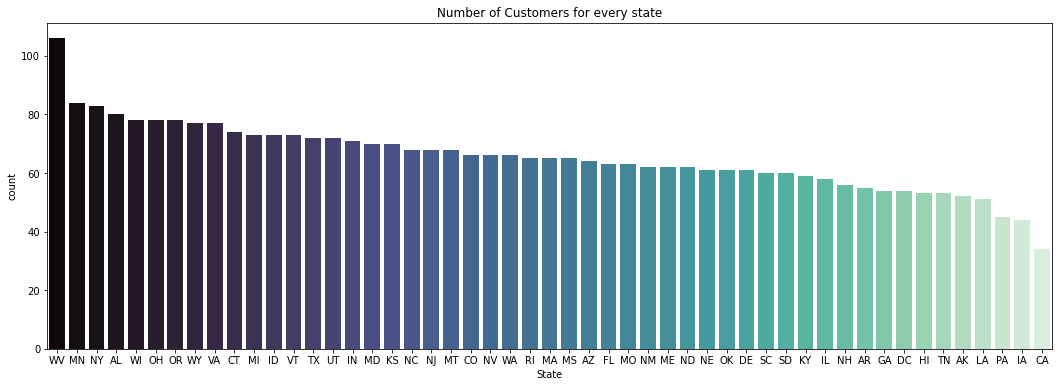

In [13]:
plt.figure(figsize = (18,6))
sns.countplot(data = telco, x = 'State',order = telco['State'].value_counts().index, palette = 'mako' )
plt.title("Number of Customers for every state")

***We can see that WV (west virginia) has the most number of customers and CA (california) has the least***

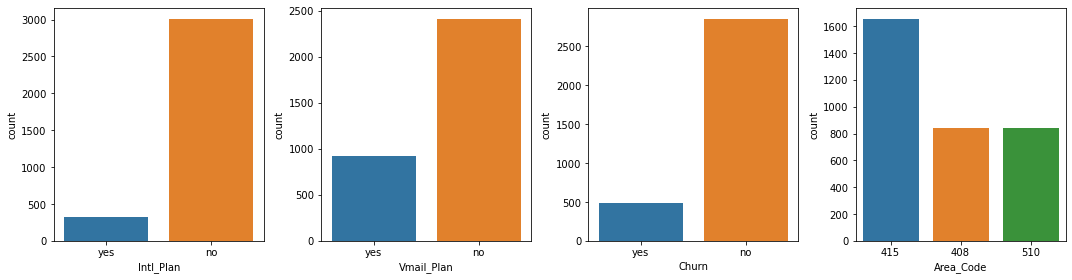

In [14]:
fig, axes = plt.subplots(nrows=1, ncols=4, figsize = (15,4))
sns.countplot(data = telco, x = 'Intl_Plan',ax=axes[0], order = ['yes', 'no'])
sns.countplot(data = telco, x= 'Vmail_Plan',ax=axes[1], order = ['yes', 'no'])
sns.countplot(data = telco, x= 'Churn',ax=axes[2], order = ['yes', 'no'])
sns.countplot(data = telco, x ='Area_Code',ax=axes[3])

plt.tight_layout()
plt.show();

***and the majority of the customers don't have international or voice mail plans***

#### 2. numericl data

In [15]:
num_var = [feature for feature in telco.columns if telco[feature].dtypes != 'O']

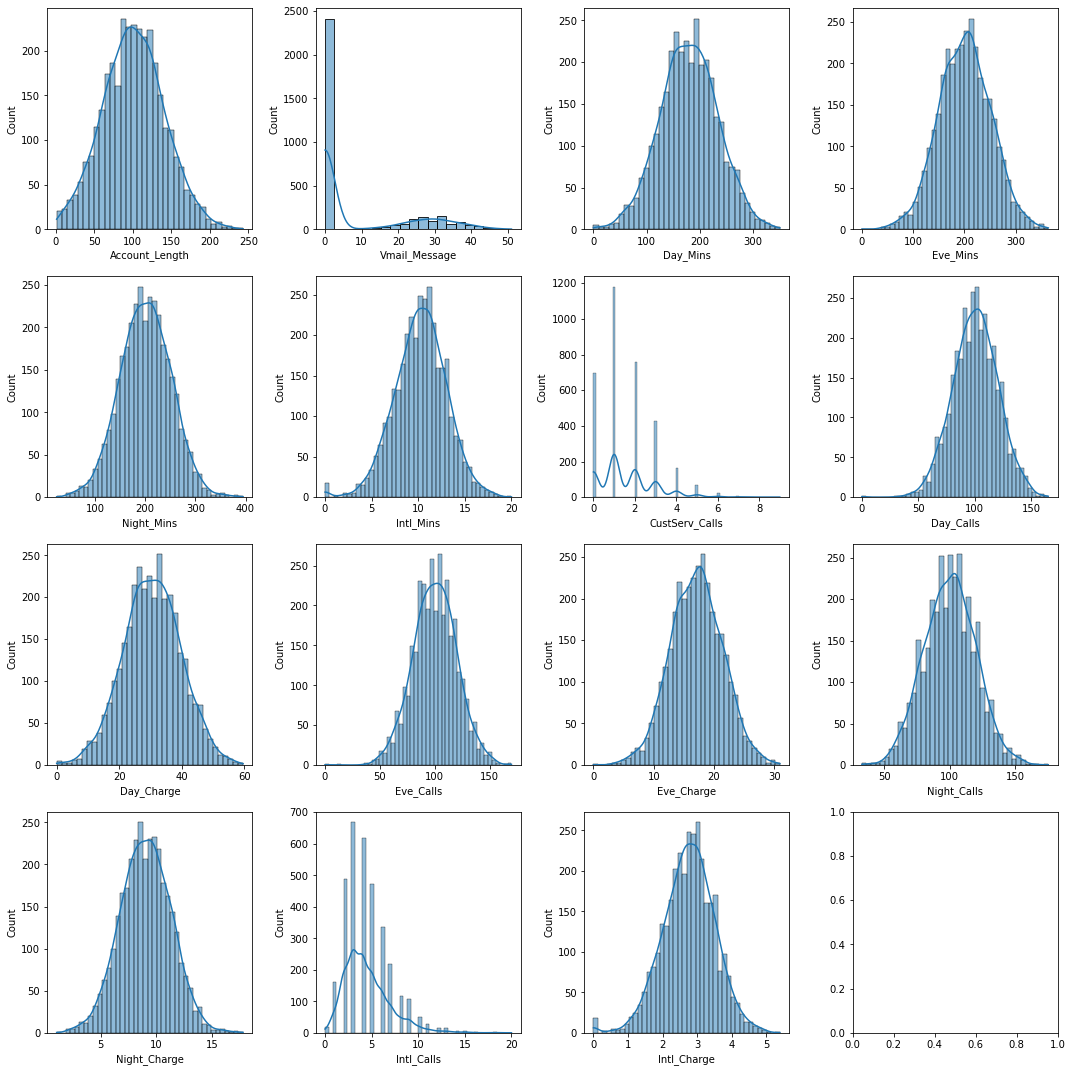

In [16]:
# Plot the distribution of the data
fig, axes = plt.subplots(nrows=4, ncols=4)
fig.set_size_inches(15, 15)
axes = axes.flatten()         # Convert axes to 1d array of length 16

for ax, column in zip(axes, num_var):
    
    sns.histplot(telco[column],ax=ax, kde = True)
plt.tight_layout()
plt.show();

***The dataset is normally distributed for the most part except for the intl calls and customer service calls which they are skewed***

### Bivariant analysis

<AxesSubplot:>

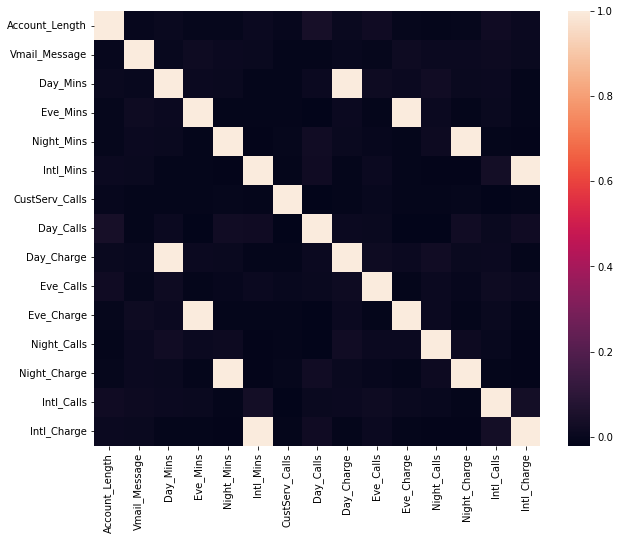

In [17]:
f, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(telco.corr())

***The data seems independant except for the relation between the charges and call length***

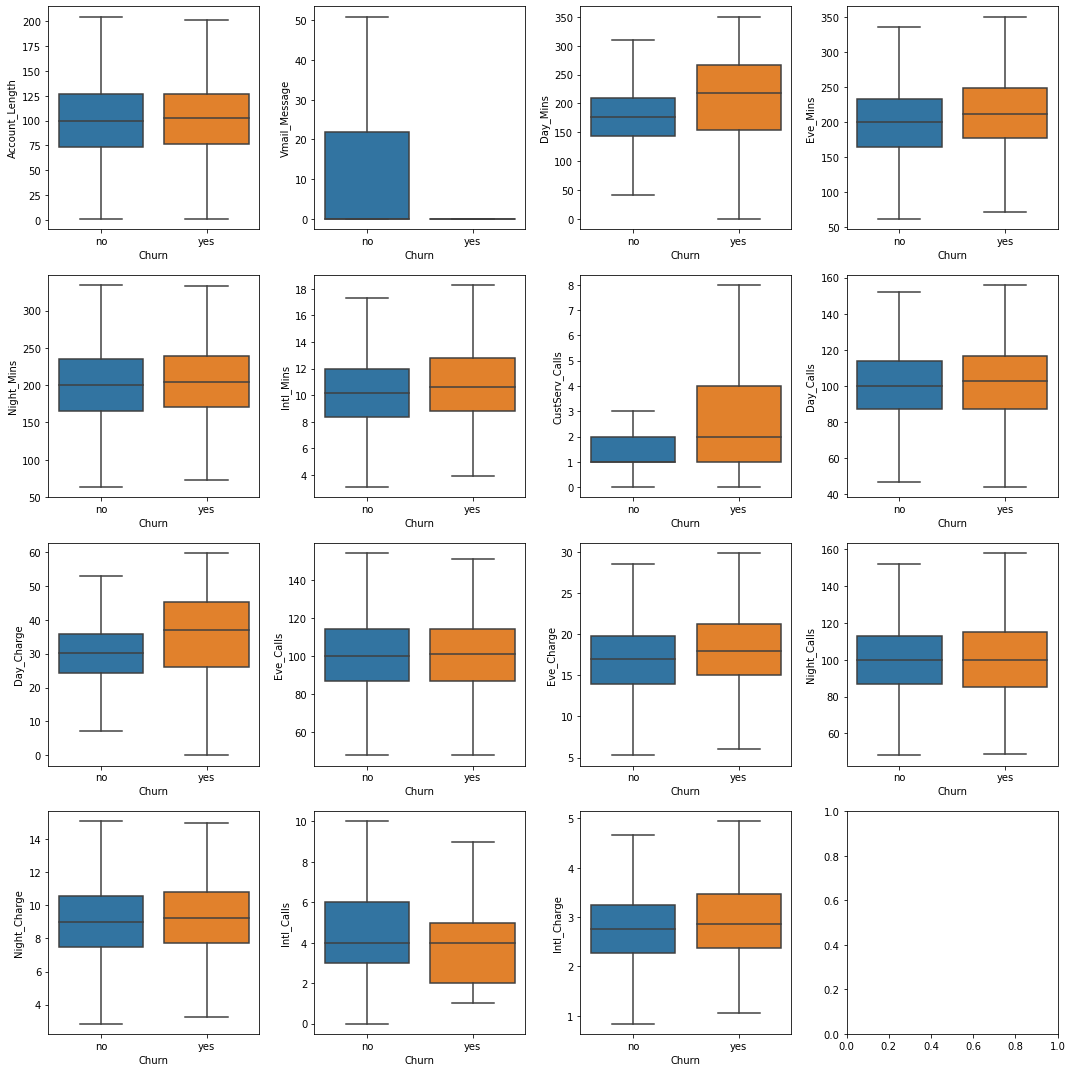

In [18]:
# Plot the distribution of the data vs churn
fig, axes = plt.subplots(nrows=4, ncols=4)
fig.set_size_inches(15, 15)
axes = axes.flatten()         # Convert axes to 1d array of length 16

for ax, column in zip(axes, num_var):
    sns.boxplot(data = telco, y = column, x = 'Churn', ax = ax, sym = "")
plt.tight_layout()
plt.show();


***Looks like customer who do churn are often charged more than the customer who dont churn and they call customer services more often***

# Features Engineering

In [19]:
# Calculate the number of minutes
telco['Total_Mins'] = telco['Day_Mins'] + telco['Eve_Mins'] + telco['Night_Mins']

# Calculate the number of calls
telco['Total_Calls'] = telco['Day_Calls'] + telco['Eve_Calls'] + telco['Night_Calls']

# Calculate the amount of charge
telco['Total_Charge'] = telco['Day_Charge'] + telco['Eve_Charge'] + telco['Night_Charge']

# Drop the used columns
telco = telco.drop(telco[['Day_Mins','Eve_Mins', 'Night_Mins', 'Day_Calls', 'Eve_Calls',
                  'Night_Calls', 'Day_Charge','Eve_Charge', 'Night_Charge']], axis=1)


# Drop the unnecessary features
telco = telco.drop(telco[['Area_Code','Phone', 'State']], axis=1)
telco.columns

Index(['Account_Length', 'Vmail_Message', 'Intl_Mins', 'CustServ_Calls',
       'Churn', 'Intl_Plan', 'Vmail_Plan', 'Intl_Calls', 'Intl_Charge',
       'Total_Mins', 'Total_Calls', 'Total_Charge'],
      dtype='object')

In [20]:
telco.head(2)

,Account_Length,Vmail_Message,Intl_Mins,CustServ_Calls,Churn,Intl_Plan,Vmail_Plan,Intl_Calls,Intl_Charge,Total_Mins,Total_Calls,Total_Charge
0,128,25,10.0,1,no,no,yes,3,2.7,707.2,300,72.86
1,107,26,13.7,1,no,no,yes,3,3.7,611.5,329,55.54


# Data preprocessing
1. Encode the categorical columns
2. Standarize numerical columns

In [21]:
# Encode the categorical columns
# Replace 'no' with 0 and 'yes' with 1 in 'Vmail_Plan'
telco['Vmail_Plan'] = telco['Vmail_Plan'].replace({'no': 0 , 'yes': 1})

# Replace 'no' with 0 and 'yes' with 1 in 'Churn'
telco['Churn'] = telco['Churn'].replace({'no': 0 , 'yes': 1})

# Replace 'no' with 0 and 'yes' with 1 in 'Intel_Plan'
telco['Intl_Plan'] = telco['Intl_Plan'].replace({'no': 0 , 'yes': 1})

telco.head(2)

,Account_Length,Vmail_Message,Intl_Mins,CustServ_Calls,Churn,Intl_Plan,Vmail_Plan,Intl_Calls,Intl_Charge,Total_Mins,Total_Calls,Total_Charge
0,128,25,10.0,1,0,0,1,3,2.7,707.2,300,72.86
1,107,26,13.7,1,0,0,1,3,3.7,611.5,329,55.54


In [22]:
Numerical = telco.nunique()[telco.nunique()>5].keys().tolist()
Numerical = Numerical[0:len(Numerical)]
Numerical

['Account_Length',
 'Vmail_Message',
 'Intl_Mins',
 'CustServ_Calls',
 'Intl_Calls',
 'Intl_Charge',
 'Total_Mins',
 'Total_Calls',
 'Total_Charge']

In [23]:
# Scale telco using StandardScaler
telco[Numerical] = StandardScaler().fit_transform(telco[Numerical])

# Print summary statistics
telco.describe()

,Account_Length,Vmail_Message,Intl_Mins,CustServ_Calls,Churn,Intl_Plan,Vmail_Plan,Intl_Calls,Intl_Charge,Total_Mins,Total_Calls,Total_Charge
count,3.333000e+03,3.333000e+03,3.333000e+03,3.333000e+03,3333.000000,3333.000000,3333.000000,3.333000e+03,3.333000e+03,3.333000e+03,3.333000e+03,3.333000e+03
mean,1.713134e-16,3.832651e-16,-3.274375e-16,3.275708e-16,0.144914,0.096910,0.276628,-1.264615e-16,2.785384e-16,1.193831e-16,2.228440e-17,2.935279e-16
std,1.000150e+00,1.000150e+00,1.000150e+00,1.000150e+00,0.352067,0.295879,0.447398,1.000150e+00,1.000150e+00,1.000150e+00,1.000150e+00,1.000150e+00
min,-2.513172e+00,-5.917599e-01,-3.667413e+00,-1.188218e+00,0.000000,0.000000,0.000000,-1.820289e+00,-3.668210e+00,-3.406422e+00,-3.282271e+00,-3.500317e+00
25%,-6.797448e-01,-5.917599e-01,-6.223690e-01,-4.279320e-01,0.000000,0.000000,0.000000,-6.011951e-01,-6.164341e-01,-6.739695e-01,-6.601291e-01,-6.766172e-01
50%,-1.627644e-03,-5.917599e-01,2.246393e-02,-4.279320e-01,0.000000,0.000000,0.000000,-1.948306e-01,2.045823e-02,1.636934e-02,9.973878e-03,-5.261419e-03
75%,6.513740e-01,8.695542e-01,6.672969e-01,3.323545e-01,0.000000,0.000000,1.000000,6.178983e-01,6.706192e-01,6.766934e-01,6.800769e-01,6.641871e-01
max,3.564766e+00,3.134591e+00,3.497397e+00,5.654360e+00,1.000000,1.000000,1.000000,6.307001e+00,3.496829e+00,3.282417e+00,3.185679e+00,3.421133e+00


# Splitting the data

In [24]:
X = telco.drop(columns= ['Churn'])
y = telco['Churn']
X.shape, y.shape

((3333, 11), (3333,))

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state = 42, stratify = y)

In [26]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((2499, 11), (834, 11), (2499,), (834,))

# Support Vector Machine (SVM)

In [27]:
from sklearn.svm import SVC

# Instantiate the classifier
svc = SVC()

# Fit the classifier
svc.fit(X_train, y_train) 

# Predict the label of the test data
y_pred = svc.predict(X_test) 

accuracy_score(y_test, y_pred) # Accuracy

0.919664268585132

In [28]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.99      0.95       713
           1       0.89      0.51      0.65       121

    accuracy                           0.92       834
   macro avg       0.90      0.75      0.80       834
weighted avg       0.92      0.92      0.91       834



In [29]:
parameters = {'kernel':('linear', 'rbf'), 'C':[1, 5, 10]}

clf_scv = GridSearchCV(SVC(), parameters) 
clf_scv.fit(X_train, y_train)  
clf_scv.best_params_ 

{'C': 5, 'kernel': 'rbf'}

In [30]:
clf_scv.best_score_

0.9435743486973948

In [31]:
# Instantiate the classifier
svc = SVC(C = 5)

# Fit the classifier
svc.fit(X_train, y_train) 

# Predict the label of the test data
y_pred = svc.predict(X_test) 

accuracy_score(y_test, y_pred) # Accuracy

0.9292565947242206

**A little better but not much**

# Logistic Regression

In [32]:
# Import LogisticRegression
from sklearn.linear_model import LogisticRegression

# Instantiate the classifier
logr = LogisticRegression()

# Fit the classifier
logr.fit(X_train, y_train) 

# Predict the label of the test data
y_pred = logr.predict(X_test) 

accuracy_score(y_test, y_pred) # Accuracy

0.8573141486810552

In [33]:
confusion_matrix(y_test, y_pred)

array([[689,  24],
       [ 95,  26]], dtype=int64)

In [34]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.97      0.92       713
           1       0.52      0.21      0.30       121

    accuracy                           0.86       834
   macro avg       0.70      0.59      0.61       834
weighted avg       0.83      0.86      0.83       834



In [35]:
# Import LogisticRegression
from sklearn.linear_model import LogisticRegression

# Instantiate the classifier
logr_mod = LogisticRegression(C= 1, penalty= 'l2', solver= 'liblinear')

# Fit the classifier
logr_mod.fit(X_train, y_train) 

# Predict the label of the test data
y_pred = logr_mod.predict(X_test) 

accuracy_score(y_test, y_pred) # Accuracy

0.8573141486810552

# Decision Tree Classifier

In [36]:
# Import DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier

# Instantiate the classifier
tree = DecisionTreeClassifier()

# Fit the classifier
tree.fit(X_train, y_train) 

# Predict the label of the test data
tree.predict(X_test) 

accuracy_score(y_test, y_pred) # Accuracy

0.8573141486810552

In [37]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.97      0.92       713
           1       0.52      0.21      0.30       121

    accuracy                           0.86       834
   macro avg       0.70      0.59      0.61       834
weighted avg       0.83      0.86      0.83       834



# Random Forest Classifier

In [38]:
from sklearn.ensemble import RandomForestClassifier

# Instantiate the classifier
clf = RandomForestClassifier()

# Fit the classifier
clf.fit(X_train, y_train) 

# Predict the label of the test data
clf.predict(X_test) 

accuracy_score(y_test, y_pred) # Accuracy

0.8573141486810552

In [39]:
from sklearn.ensemble import GradientBoostingClassifier

xg = GradientBoostingClassifier(learning_rate=0.01, n_estimators=400,max_depth=13)

xg.fit(X_train, y_train) 

# Predict the label of the test data
xg.predict(X_test) 

accuracy_score(y_test, y_pred) # Accuracy

0.8573141486810552